In [2]:
import pyjulip

In [15]:
from ase.io import read, write
from ase.optimize import LBFGS
import time
from ase.build import bulk
import random
from ase.lattice.cubic import BodyCenteredCubic
import matplotlib.pyplot as plt
from ase.io import read, write
import numpy as np

In [4]:
calc = pyjulip.ACE("./HfNiTi_B3_N3_15_d1.0_a0.02_r1.4.json")

In [71]:
D = {}
for i in range(100):
    at = BodyCenteredCubic("Ti", latticeconstant=3.16) * (3,3,3)
    L = ["Ti"] * 25 + ["Ni"] * 25 + ["Hf"] * 4
    random.shuffle(L)
    at.set_chemical_symbols("".join(L)) 
    at.rattle(0.1)
    at.set_calculator(calc)
    dyn = LBFGS(at)
    dyn.run(fmax=0.01)
    D[at.get_potential_energy()/len(at)] = at

90*       0.0326
LBFGS:  109 21:40:08     -380.566958*       0.0252
LBFGS:  110 21:40:08     -380.567381*       0.0338
LBFGS:  111 21:40:08     -380.567781*       0.0323
LBFGS:  112 21:40:08     -380.568047*       0.0431
LBFGS:  113 21:40:08     -380.568401*       0.0453
LBFGS:  114 21:40:08     -380.568784*       0.0320
LBFGS:  115 21:40:08     -380.569257*       0.0277
LBFGS:  116 21:40:08     -380.569525*       0.0337
LBFGS:  117 21:40:09     -380.569758*       0.0303
LBFGS:  118 21:40:09     -380.569998*       0.0222
LBFGS:  119 21:40:09     -380.570282*       0.0236
LBFGS:  120 21:40:09     -380.570492*       0.0237
LBFGS:  121 21:40:09     -380.570613*       0.0184
LBFGS:  122 21:40:09     -380.570708*       0.0159
LBFGS:  123 21:40:09     -380.570805*       0.0176
LBFGS:  124 21:40:09     -380.570884*       0.0118
LBFGS:  125 21:40:10     -380.570933*       0.0136
LBFGS:  126 21:40:10     -380.570974*       0.0120
LBFGS:  127 21:40:10     -380.571019*       0.0100
LBFGS:  128 21

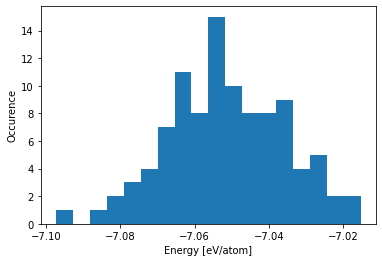

In [73]:
Es = list(D.keys())
plt.hist(Es, bins=18)
plt.xlabel("Energy [eV/atom]")
plt.ylabel("Occurence")
plt.savefig("E_hist.pdf")

In [74]:
minEs = sorted(list(D.keys()))
al = []
for minE in minEs:
    print(minE)
    al.append(D[minE])
write("minEs.xyz", al)

-7.09729451784445
-7.0877082140025
-7.079499140015462
-7.079108569769638
-7.07773611843371
-7.076329135294473
-7.075390046430262
-7.074471694050283
-7.074283036775381
-7.072561305811828
-7.071692556771385
-7.06763636879888
-7.06761984369261
-7.066638502896429
-7.066597946682298
-7.066521685812915
-7.066458881218318
-7.066174689833272
-7.065386532155249
-7.064947722295333
-7.064261952056776
-7.063820242628811
-7.06376505482598
-7.063750728439722
-7.062802105749869
-7.0626948322637055
-7.062289727390384
-7.06168744947045
-7.061115578701467
-7.059916496115718
-7.059680106022324
-7.059282552022681
-7.059201020995953
-7.058868679618896
-7.058119573901657
-7.057678937986316
-7.056753333816209
-7.056192395016815
-7.055884963551149
-7.055822310385532
-7.055467918201291
-7.055361474094904
-7.055249325804005
-7.055233415012537
-7.054530888021662
-7.053520346855618
-7.053215694799313
-7.052935123765177
-7.052908607498772
-7.05266404489381
-7.052199711621267
-7.0520590084394605
-7.051327098950203


In [5]:
import utilities

In [12]:
D = {}
for i in range(10):
    at = BodyCenteredCubic("Ti", latticeconstant=3.16) * (3,3,3)
    L = ["Ti"] * 25 + ["Ni"] * 25 + ["Hf"] * 4
    random.shuffle(L)
    at.set_chemical_symbols("".join(L)) 
    at.set_calculator(calc)
    at = utilities.relax_config(at, calc, relax_pos=True, relax_cell=True, tol=5e-3, method='lbfgs', max_steps=200)
    print(at.get_potential_energy()/len(at))
    D[at.get_potential_energy()/len(at)] = at

4:08:25     -384.162789       0.1319       0.0011
PreconLBFGS:  47  14:08:26     -384.189879       0.1271       0.0009
PreconLBFGS:  48  14:08:28     -384.206979       0.2022       0.0008
PreconLBFGS:  49  14:08:29     -384.227913       0.2715       0.0013
PreconLBFGS:  50  14:08:30     -384.264823       0.2252       0.0017
PreconLBFGS:  51  14:08:31     -384.301294       0.2021       0.0012
PreconLBFGS:  52  14:08:32     -384.312483       0.1814       0.0004
PreconLBFGS:  53  14:08:33     -384.326272       0.1647       0.0008
PreconLBFGS:  54  14:08:34     -384.342695       0.1356       0.0011
PreconLBFGS:  55  14:08:35     -384.357234       0.1555       0.0007
PreconLBFGS:  56  14:08:36     -384.364439       0.1401       0.0001
PreconLBFGS:  57  14:08:37     -384.371034       0.1109       0.0005
PreconLBFGS:  58  14:08:38     -384.378570       0.1238       0.0008
PreconLBFGS:  59  14:08:39     -384.384467       0.1152       0.0005
PreconLBFGS:  60  14:08:40     -384.388210       0.10

In [21]:
minEs = sorted(list(D.keys()))
al = []
for minE in minEs:
    print(minE)
    al.append(D[minE])
write("minEs.xyz", al)

-7.161888817189829
-7.144400980496011
-7.141198891996987
-7.136940333392553
-7.1369350973237085
-7.131714178106801
-7.119355593169969
-7.118983368403509
-7.113151980046138
-7.096108094959748
